In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as py

In [2]:
basic_model_comparison = pd.read_csv('Basic Model stats.csv')

In [3]:
from tabulate import tabulate

table = tabulate(basic_model_comparison, headers = 'keys', tablefmt = 'fancy_grid')

print(table)


╒════╤══════════════════════╤════════════╤═══════════════════════╤════════════════════╤══════════════════════╤═══════════╕
│    │ Model                │   Accuracy │   Macro Avg Precision │   Macro Avg Recall │   Macro Avg F1-Score │   Support │
╞════╪══════════════════════╪════════════╪═══════════════════════╪════════════════════╪══════════════════════╪═══════════╡
│  0 │ Logistic Regression  │   0.162025 │              0.159201 │           0.162025 │             0.158934 │      3160 │
├────┼──────────────────────┼────────────┼───────────────────────┼────────────────────┼──────────────────────┼───────────┤
│  1 │ Decision Tree        │   0.162025 │              0.159201 │           0.162025 │             0.158934 │      3160 │
├────┼──────────────────────┼────────────┼───────────────────────┼────────────────────┼──────────────────────┼───────────┤
│  2 │ Gaussian Naive Bayes │   0.211709 │              0.233065 │           0.211709 │             0.208414 │      3160 │
├────┼──────────

In [ ]:
### Logistic Regression

In [4]:
lg_stats = pd.read_csv('Logistic Regression hypertuning.csv')

In [ ]:
#Parameter Grid
param_grid = {
    'C':[0.1,1,10],
    'penalty':['elasticnet'],
    'solver':['saga'],
    'l1_ratio':[0.5,0.75,1.0],
    'max_iter':[500]
}

In [5]:
lg_stats

,C,l1_ratio,Mean Test Score,Std Test Score,Rank
0,0.1,1.00,0.190005,0.012070,1
1,0.1,0.75,0.189682,0.009194,2
2,1.0,0.75,0.189679,0.005585,3
3,10.0,1.00,0.189357,0.007404,4
4,1.0,0.50,0.189357,0.006409,4
5,10.0,0.75,0.189357,0.006409,4
6,1.0,1.00,0.189357,0.006409,4
7,10.0,0.50,0.189357,0.006100,8
8,0.1,0.50,0.187422,0.007247,9


In [7]:
import seaborn as sns


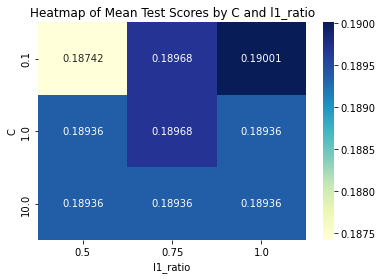

In [10]:
pivot_table = lg_stats.pivot("C", "l1_ratio", "Mean Test Score")
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".5f")
py.title("Heatmap of Mean Test Scores by C and l1_ratio")
py.show()

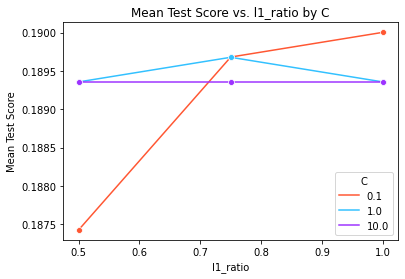

In [18]:
custom_palette = {
    0.1: '#FF5733',  # bright red-orange
    1.0: '#33C1FF',  # sky blue
    10.0: '#9D33FF'  # purple
}
sns.lineplot(data=lg_stats, x="l1_ratio", y="Mean Test Score", hue="C", marker = "o", palette = custom_palette )
py.title("Mean Test Score vs. l1_ratio by C")
py.show()

In [19]:
## Decision Tree Hypertuning

In [21]:
dc_stats = pd.read_csv('Decision Tree hypertuning.csv')

In [22]:
dc_stats

,Rank,Criterion,Max Depth,Mean Test Score,Std Test Score
0,1,Entropy,None,0.439355,0.011068
1,2,Gini,None,0.437106,0.032753
2,3,Entropy,None,0.414197,0.014469
3,4,Gini,None,0.412903,0.003557
4,5,Entropy,None,0.409036,0.012974
5,212,Entropy,3,0.119680,0.007828
6,213,Gini,3,0.117745,0.008346
7,214,Gini,3,0.117419,0.005062
8,215,Gini,3,0.116127,0.011674
9,216,Gini,3,0.115489,0.012014


Text(0.5, 1.0, 'Comparison between Gini and Entropy')

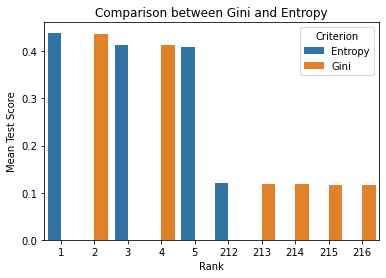

In [25]:
sns.barplot(data=dc_stats, x='Rank', y='Mean Test Score', hue='Criterion')
py.title('Comparison between Gini and Entropy')

In [26]:
#Naive Bayes


In [27]:
nb_stats = pd.read_csv('Naive Bayes hypertuning.csv')

In [28]:
nb_stats

,Var Smoothing,Mean Test Score,Std Test Score,Rank
0,1.000000e-09,0.236448,0.012541,1
1,1.000000e-08,0.236448,0.012541,1
2,1.000000e-07,0.236448,0.012541,1
3,1.000000e-06,0.236448,0.012541,1
4,1.000000e-05,0.236126,0.012995,5


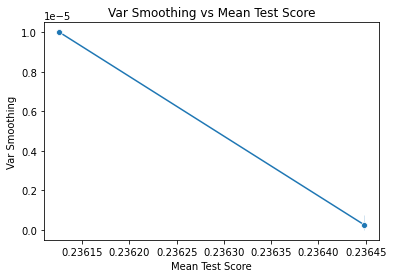

In [62]:
sns.lineplot(data = nb_stats, x='Mean Test Score', y = 'Var Smoothing', marker='o')
py.title('Var Smoothing vs Mean Test Score')
py.show()

In [40]:
table_ = tabulate(nb_stats, headers = 'keys', tablefmt = 'fancy_grid')

In [41]:
print(table_)

╒════╤═════════════════╤═══════════════════╤══════════════════╤════════╕
│    │   Var Smoothing │   Mean Test Score │   Std Test Score │   Rank │
╞════╪═════════════════╪═══════════════════╪══════════════════╪════════╡
│  0 │           1e-09 │          0.236448 │         0.012541 │      1 │
├────┼─────────────────┼───────────────────┼──────────────────┼────────┤
│  1 │           1e-08 │          0.236448 │         0.012541 │      1 │
├────┼─────────────────┼───────────────────┼──────────────────┼────────┤
│  2 │           1e-07 │          0.236448 │         0.012541 │      1 │
├────┼─────────────────┼───────────────────┼──────────────────┼────────┤
│  3 │           1e-06 │          0.236448 │         0.012541 │      1 │
├────┼─────────────────┼───────────────────┼──────────────────┼────────┤
│  4 │           1e-05 │          0.236126 │         0.012995 │      5 │
╘════╧═════════════════╧═══════════════════╧══════════════════╧════════╛


In [42]:
##Random Forests

In [46]:
rf_stats = pd.read_csv('Random Forests hypertuning.csv')

In [59]:
rf_stats =rf_stats.reset_index()

Text(0.5, 1.0, 'Bootstrap Comparison')

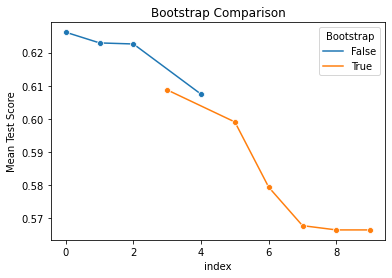

In [63]:
sns.lineplot(data = rf_stats,x = 'index', y='Mean Test Score', hue='Bootstrap', marker = 'o') 
py.title('Bootstrap Comparison')

In [64]:
##final Comparison

In [69]:
fc_stats = pd.read_csv('Final Models.csv')

In [70]:
fc_stats

,Model,Accuracy,Macro Precision,Macro Recall,Macro F1-Score,Support
0,Logistic Regression,0.166772,0.164540,0.166772,0.163675,3160
1,Decision Tree,0.204747,0.203083,0.204747,0.202820,3160
2,Gaussian Naive Bayes,0.211709,0.233065,0.211709,0.208414,3160
3,Random Forest,0.473418,0.489672,0.473418,0.462910,3160


In [74]:
fc_table=tabulate(fc_stats, headers = 'keys', tablefmt= 'fancy_grid')

In [75]:
print(fc_table)

╒════╤══════════════════════╤════════════╤═══════════════════╤════════════════╤══════════════════╤═══════════╕
│    │ Model                │   Accuracy │   Macro Precision │   Macro Recall │   Macro F1-Score │   Support │
╞════╪══════════════════════╪════════════╪═══════════════════╪════════════════╪══════════════════╪═══════════╡
│  0 │ Logistic Regression  │   0.166772 │          0.16454  │       0.166772 │         0.163675 │      3160 │
├────┼──────────────────────┼────────────┼───────────────────┼────────────────┼──────────────────┼───────────┤
│  1 │ Decision Tree        │   0.204747 │          0.203083 │       0.204747 │         0.20282  │      3160 │
├────┼──────────────────────┼────────────┼───────────────────┼────────────────┼──────────────────┼───────────┤
│  2 │ Gaussian Naive Bayes │   0.211709 │          0.233065 │       0.211709 │         0.208414 │      3160 │
├────┼──────────────────────┼────────────┼───────────────────┼────────────────┼──────────────────┼───────────┤
│

In [76]:
##final model vs basic models
final_comparison = pd.read_csv('Final model and basic model comparison.csv')

In [79]:
table__ = tabulate(final_comparison, headers = 'keys', tablefmt = 'grid_line')
print(table__)

    Model                Accuracy (Before → After)    Macro Precision    Macro Recall    Macro F1-Score      Support
--  -------------------  ---------------------------  -----------------  --------------  ----------------  ---------
 0  Logistic Regression  0.162 → 0.167                0.159 → 0.165      0.162 → 0.167   0.159 → 0.164          3160
 1  Decision Tree        0.162 → 0.205                0.159 → 0.203      0.162 → 0.205   0.159 → 0.203          3160
 2  Gaussian NB          0.212 → 0.212                0.233 → 0.233      0.212 → 0.212   0.208 → 0.208          3160
 3  Random Forest        0.233 → 0.473                0.243 → 0.490      0.233 → 0.473   0.225 → 0.463          3160
